## Visualization of CFD inputs to mix of raceway and shaft outputs, and feature ranking

most inputs

outputs:

(13, 'o_raceway_flame_temp_k')

(19, 'o_shaft_top_gas_temp_c')

(20, 'o_shaft_press_drop_pa')



In [1]:
#######################################################
##
## Visualization of regression models for system control
##
#######################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import yellowbrick

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score


#######################################################

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

#######################################################

In [2]:
CFD_raw_data = pd.read_csv('CFD.6.2022.csv') 

In [3]:
headers_list = CFD_raw_data.columns.values.tolist()
print(headers_list)
print(len(headers_list))
print(headers_list[27])

for i, name in enumerate(headers_list):
    print((i, name))

['index', 'i_pul_coal_inj_kg_thm', 'i_nat_gas_inj_kg_thm', 'i_nat_gas_t_k', 'i_o2_vol_perce', 'i_bf_windrate_nm3_hr', 'i_hb_moist_g_nm3', 'i_hot_blast_press_pa', 'i_hot_blast_temp_k', 'i_coke_weight_kg', 'i_ore_weight_kg', 'o_tuyere_exit_velo_m_s', 'o_tuyere_t_k', 'o_raceway_flame_temp_k', 'o_raceway_coal_burn_perce', 'o_raceway_volume_m', 'o_raceway_depth _m', 'o_shaft_co_utiliz', 'o_shaft_h2_utiliz', 'o_shaft_top_gas_temp_c', 'o_shaft_press_drop_pa', 'o_shaft_coke_rate_kg_thm', 'o_shaft_cohesive_zone_tip_height_m', 'o_shaft_cohes_zone_root_height_m', 'o_shaft_co_v_perc', 'o_shaft_co2_v_perc', 'o_shaft_h2_v_perce', 'o_shaft_n2_v_perc']
28
o_shaft_n2_v_perc
(0, 'index')
(1, 'i_pul_coal_inj_kg_thm')
(2, 'i_nat_gas_inj_kg_thm')
(3, 'i_nat_gas_t_k')
(4, 'i_o2_vol_perce')
(5, 'i_bf_windrate_nm3_hr')
(6, 'i_hb_moist_g_nm3')
(7, 'i_hot_blast_press_pa')
(8, 'i_hot_blast_temp_k')
(9, 'i_coke_weight_kg')
(10, 'i_ore_weight_kg')
(11, 'o_tuyere_exit_velo_m_s')
(12, 'o_tuyere_t_k')
(13, 'o_raceway

In [4]:
CFDdata_np = CFD_raw_data.to_numpy()
## print(CFDdata_np)
print(CFDdata_np.shape)

(56, 28)


In [5]:
#######################################################

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [13, 19, 20]                           

#######################################################

X = CFDdata_np[:, input_indeces]

y = CFDdata_np[:, output_indeces]

print(X.shape)
print(y.shape)

(56, 10)
(56, 3)


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

## Residuals plot

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.

(56, 10)
(56, 1)


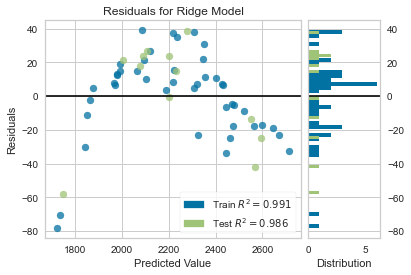

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [7]:
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [13]                           

#######################################################

X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

print(X.shape)
print(y.shape)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

(56, 10)
(56, 1)


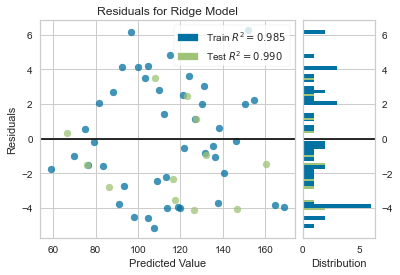

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [8]:
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [19]                           

#######################################################

X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

print(X.shape)
print(y.shape)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

(56, 10)
(56, 1)


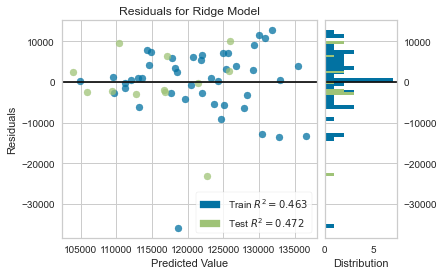

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [9]:
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [20]                           

#######################################################

X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

print(X.shape)
print(y.shape)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.693e+03, tolerance: 3.006e+02
  model = cd_fast.enet_coordinate_descent(


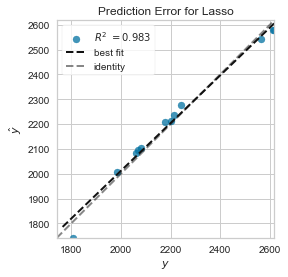

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [13]                            


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################


# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+02, tolerance: 2.997e+00
  model = cd_fast.enet_coordinate_descent(


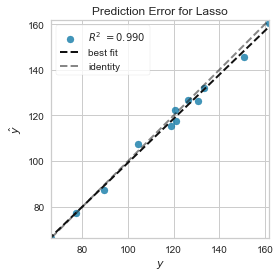

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [19]                            


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################


# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+09, tolerance: 5.666e+05
  model = cd_fast.enet_coordinate_descent(


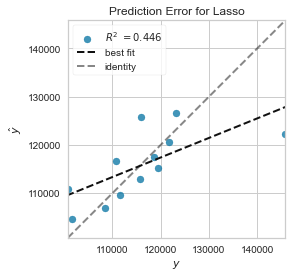

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [20]                            


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################


# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Feature Ranking

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+04, tolerance: 3.735e+02
  model = cd_fast.enet_coordinate_descent(


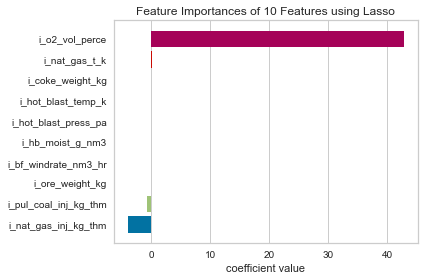

<AxesSubplot:title={'center':'Feature Importances of 10 Features using Lasso'}, xlabel='coefficient value'>

In [13]:
from sklearn.linear_model import Lasso
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [13]                            


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

# Title case the feature for better display and create the visualizer
## labels = list(map(lambda s: s.title(), dataset.meta['features']))

labels = ['i_pul_coal_inj_kg_thm','i_nat_gas_inj_kg_thm','i_nat_gas_t_k','i_o2_vol_perce','i_bf_windrate_nm3_hr',
          'i_hb_moist_g_nm3', 'i_hot_blast_press_pa','i_hot_blast_temp_k','i_coke_weight_kg','i_ore_weight_kg']

viz = FeatureImportances(Lasso(), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.479e+02, tolerance: 3.880e+00
  model = cd_fast.enet_coordinate_descent(


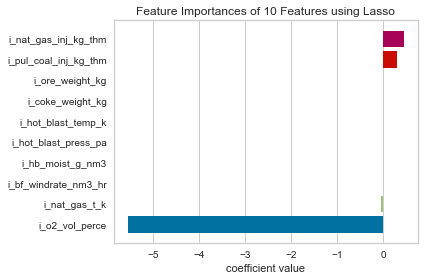

<AxesSubplot:title={'center':'Feature Importances of 10 Features using Lasso'}, xlabel='coefficient value'>

In [14]:
from sklearn.linear_model import Lasso
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [19]                            


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

# Title case the feature for better display and create the visualizer
## labels = list(map(lambda s: s.title(), dataset.meta['features']))

labels = ['i_pul_coal_inj_kg_thm','i_nat_gas_inj_kg_thm','i_nat_gas_t_k','i_o2_vol_perce','i_bf_windrate_nm3_hr',
          'i_hb_moist_g_nm3', 'i_hot_blast_press_pa','i_hot_blast_temp_k','i_coke_weight_kg','i_ore_weight_kg']

viz = FeatureImportances(Lasso(), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.936e+09, tolerance: 7.508e+05
  model = cd_fast.enet_coordinate_descent(


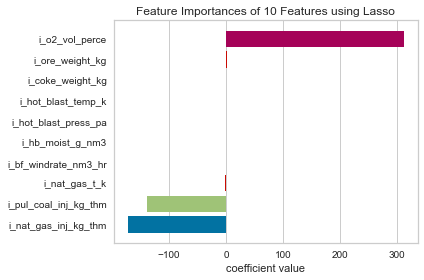

<AxesSubplot:title={'center':'Feature Importances of 10 Features using Lasso'}, xlabel='coefficient value'>

In [15]:
from sklearn.linear_model import Lasso
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [20]                            


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

# Title case the feature for better display and create the visualizer
## labels = list(map(lambda s: s.title(), dataset.meta['features']))

labels = ['i_pul_coal_inj_kg_thm','i_nat_gas_inj_kg_thm','i_nat_gas_t_k','i_o2_vol_perce','i_bf_windrate_nm3_hr',
          'i_hb_moist_g_nm3', 'i_hot_blast_press_pa','i_hot_blast_temp_k','i_coke_weight_kg','i_ore_weight_kg']

viz = FeatureImportances(Lasso(), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

## "Effect Plots" for regression model visualization

Visualization of regression models with Effect Plots

In [16]:
# Load the regression dataset
###################################################
# Load a regression dataset

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [13, 19, 20]                           


X = CFDdata_np[:, input_indeces]
y = CFDdata_np[:, output_indeces]

###################################################

In [17]:
###################################################################
## for scaling

epsilon = 0.0001

x_means      =  X.mean(0)
x_deviations =  X.std(0) + epsilon

X_scaled = (X - x_means) / x_deviations

print(X_scaled.shape)
## print(X_scaled)

(56, 10)


In [18]:
###################################################################


y_means      = y.mean(0)
y_deviations = y.std(0) + epsilon

y_scaled = (y - y_means) / y_deviations

print(y.shape)


####################################################################

(56, 3)


## Apply the Analytical Solution
    
Solve linear regression with analytical solution
    
$ \large \theta = (X^{T} X)^{-1} X^{T} y $
    
and then calculate y_pred
 
$  \large  \hat{y} = X * \theta  $
 

In [19]:
## adding the little bit of noise avoids singular error

n = 1000
X_scaled = X_scaled + 0.00001 * np.random.rand(10)


w = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y_scaled

print(w)

y_pred = X_scaled @ w

[[     -2.48717072       1.08747494      -9.55178606]
 [     -3.59137595       1.54369668     -11.29871936]
 [      0.03502753      -0.12453373       0.00552947]
 [      0.12695678      -0.63529041      -1.57021091]
 [ 249215.43902819   30143.77630527  477384.14907687]
 [-154987.66676184   44521.04754737 -368008.36867505]
 [ 155625.51698866  -61045.50228644  476027.97679582]
 [-191782.09013479  147847.29923019 -204596.63364547]
 [ 118305.26013565 -352926.16972797 -522786.84241655]
 [      1.90864885      -0.38212491       8.74240533]]


In [20]:
print(y_scaled)

[[-0.11265417  0.15512391 -1.04917252]
 [ 0.44782827 -0.72331969 -1.05377664]
 [ 0.96138184 -1.13759257 -0.72111469]
 [ 1.46564644 -1.83944477 -0.16824245]
 [-0.09416528 -0.14917161 -1.3783911 ]
 [-0.068064   -0.39101695 -1.63527631]
 [ 0.97888724 -1.35056068 -0.76518766]
 [ 1.00278147 -1.54124687 -0.68098773]
 [-0.70492201  0.66455752 -0.77255633]
 [-0.18945179 -0.17986102 -1.12560045]
 [ 0.27914378 -0.45572382 -0.40425236]
 [ 0.74437069 -1.33825908  0.36299791]
 [-0.66643414  0.43018888 -1.71330718]
 [-0.63720815  0.21749811 -0.77568102]
 [-1.03050457  1.06406696 -0.86488321]
 [-0.54846922  0.21831872 -0.49800168]
 [-0.09532301 -0.0789598  -0.35443697]
 [ 0.35032697 -0.76210506  0.14227463]
 [-1.00268798  0.86679308 -0.68473857]
 [-0.95992928  0.70116598 -0.42561045]
 [-1.43724076  1.43428887  0.27988014]
 [-1.0322431   0.86349923  0.14866564]
 [-0.61871151  0.27602378  0.2118849 ]
 [-0.20710045 -0.53463185  1.96507051]
 [-1.42056398  1.28019215  2.93911338]
 [-1.39419166  1.2009232 

In [21]:
print(y_pred)

[[-0.13908639  0.07259004 -1.39599337]
 [ 0.34354427 -0.56402444 -1.09050724]
 [ 0.82617493 -1.20063893 -0.78502111]
 [ 1.30880559 -1.83725341 -0.47953498]
 [-0.09100021 -0.09837124 -1.38840246]
 [-0.04291403 -0.26933253 -1.38081154]
 [ 0.87426111 -1.37160021 -0.77743019]
 [ 0.92234729 -1.54256149 -0.76983928]
 [-0.66981309  0.65180411 -0.87264792]
 [-0.18718243  0.01518963 -0.56716179]
 [ 0.29544824 -0.62142485 -0.26167566]
 [ 0.7780789  -1.25803934  0.04381047]
 [-0.62172691  0.48084283 -0.865057  ]
 [-0.57364073  0.30988154 -0.85746609]
 [-1.00048595  1.01268556 -0.54658526]
 [-0.51785529  0.37607108 -0.24109913]
 [-0.03522462 -0.26054341  0.06438701]
 [ 0.44740604 -0.89715789  0.36987314]
 [-0.95239977  0.84172427 -0.53899434]
 [-0.90431359  0.67076299 -0.53140342]
 [-1.49649524  1.55400773 -0.05749126]
 [-1.01386458  0.91739325  0.24799487]
 [-0.53123391  0.28077876  0.553481  ]
 [-0.04860325 -0.35583572  0.85896713]
 [-1.44840906  1.38304644 -0.04990034]
 [-1.40032288  1.21208516

## Visualize with Effect Plot

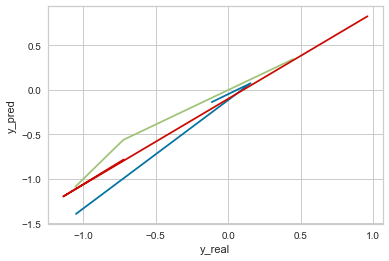

In [22]:
plt.xlabel("y_real")
plt.ylabel("y_pred")

plt.plot(y_scaled[0], y_pred[0]) # plot first line
plt.plot(y_scaled[1], y_pred[1]) # plot first line
plt.plot(y_scaled[2], y_pred[2]) # plot first line

In [23]:
print(y_pred.shape)

(56, 3)
